In [114]:
import pandas as pd
import klib as kl


In [115]:
data = pd.read_csv('data/WIOA_GA_2022.csv')
data.head()

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_1155/3140198450.py:1: DtypeWarning: Columns (95,185) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/WIOA_GA_2022.csv')


,PIRL100,PIRL108A,PIRL108B,PIRL201,PIRL202,PIRL203,PIRL204,PIRL205,PIRL206,PIRL207,PIRL208,PIRL209,PIRL210,PIRL211,PIRL212,PIRL213,PIRL214,PIRL215,PIRL300,PIRL301,PIRL302,PIRL303,PIRL304,PIRL305,PIRL307,PIRL309,PIRL315,PIRL316,PIRL400,PIRL402,PIRL403,PIRL404,PIRL405,PIRL406,PIRL407,PIRL408,PIRL409,PIRL410,PIRL413,PIRL600,PIRL601,PIRL602,PIRL603,PIRL604,PIRL701,PIRL702,PIRL704,PIRL800,PIRL801,PIRL802,PIRL803,PIRL804,PIRL805,PIRL806,PIRL807,PIRL808,PIRL900,PIRL901,PIRL903,PIRL904,PIRL905,PIRL906,PIRL907,PIRL908,PIRL910,PIRL911,PIRL914,PIRL916,PIRL917,PIRL918,PIRL921,PIRL922,PIRL923,PIRL930,PIRL931,PIRL932,PIRL935,PIRL1000,PIRL1001,PIRL1002,PIRL1003,PIRL1007,PIRL1100,PIRL1101,PIRL1102,PIRL1103,PIRL1104,PIRL1105,PIRL1200,PIRL1201,PIRL1202,PIRL1205,PIRL1210,PIRL1211,PIRL1300,PIRL1301,PIRL1302,PIRL1303,PIRL1305,PIRL1306,PIRL1307,PIRL1308,PIRL1319,PIRL1320,PIRL1328,PIRL1332,PIRL1333,PIRL1600,PIRL1601,PIRL1602,PIRL1603,PIRL1604,PIRL1605,PIRL1606,PIRL1607,PIRL1614,PIRL1615,PIRL1616,PIRL1617,PIRL1618,PIRL1700,PIRL1701,PIRL1702,PIRL1703,PIRL1704,PIRL1705,PIRL1706,PIRL1800,PIRL1801,PIRL1802,PIRL1803,PIRL1804,PIRL1805,PIRL1806,PIRL1807,PIRL1808,PIRL1809,PIRL1810,PIRL1811,PIRL1812,PIRL1813,PIRL1814,CALC4000,CALC4001,CALC4002,CALC4003,CALC4004,CALC4005,CALC4006,CALC4007,CALC4008,CALC4009,CALC4010,CALC4011,CALC4012,CALC4013,CALC4014,CALC4015,CALC4016,CALC4017,CALC4018,CALC4019,CALC4020,CALC4021,CALC4022,CALC4023,CALC4024,CALC4025,CALC4026,CALC4027,CALC4028,CALC4029,CALC4030,CALC4031,CALC4032,CALC4033,CALC4034,CALC4035,CALC4036,CALC4037,CALC4038,CALC4039,CALC4040,CALC4041,REPORT_QUARTER,LOCAL_BOARD_NAME
0,0eed4DL9UdF5,13050.0,NaN,1,1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,12.0,1.0,5.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20230605.0,NaN,0,NaN,1,20230605.0,NaN,NaN,9.0,9.0,0.0,9.0,9.0,0,0.0,NaN,NaN,0.0,4.0,9.0,0.0,20230531.0,NaN,20230602.0,NaN,20230531.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,20230605.0,10.0,NaN,514122.0,1.0,20230630.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,20230626.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,20230626.0,20230605.0,NaN,NaN,NaN,GA,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,9999.0,0.0,20230630,Georgia Mountains (Area 2)
1,0eedffcee0DU,13050.0,NaN,2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,5.0,3.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20190724.0,20210802.0,1,0.0,0,NaN,0.0,NaN,9.0,NaN,0.0,9.0,9.0,0,0.0,NaN,0.0,0.0,4.0,9.0,0.0,20190617.0,20190724.0,20210521.0,20210802.0,20190620.0,20210521.0,20210521.0,20210802.0,NaN,20210802.0,NaN,20190724.0,20210802.0,20190724.0,0.0,NaN,0.0,1.0,GWINNETT TECHNICAL COLLEGE,20190724.0,6.0,513801.0,291141.0,1.0,20210521.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,622110.0,999999.0,999999.0,999999.0,0.0,0.0,0.0,0.0,5137.0,14324.0,14308.0,14230.0,2.0,20210508.0,0.0,NaN,0.0,NaN,NaN,20210521.0,NaN,NaN,NaN,20190724.0,NaN,20210521.0,NaN,GA,1.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,14324.0,NaN,1.0,NaN,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,2021.0,0.0,20230630,Georgia Mountains (Area 2)
2,0eeeA4eFUa09,13250.0,13903.0,2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,232011.0,541110.0,541110.0,541110.0,12.0,7.0,5.0,NaN,0.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20230327.0,NaN,0,0.0,0,NaN,0.0,0.0,9.0,NaN,0.0,NaN,9.0,1,0.0,0.0,NaN,NaN,NaN,0.0,0.0,20230321.0,20230327.0,20230612.0,20230404.0,20230612.0,20230404.0,20230612.0,NaN,20230404.0,NaN,20230329.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [116]:
field_lookups = pd.read_csv('reference_data/reference_table_lookups.csv').iloc[:,:6]
field_lookups_dict = field_lookups[['DATA ELEMENT NO.', 'DATA ELEMENT NAME']].drop_duplicates()
field_lookups_dict = dict(zip(field_lookups_dict['DATA ELEMENT NO.'], field_lookups_dict['DATA ELEMENT NAME']))

In [117]:
field_lookups.head(5)

,DATA ELEMENT NO.,DATA ELEMENT NAME,DATA TYPE/ \nFIELD LENGTH,DATA ELEMENT DEFINITIONS/INSTRUCTIONS,CODE VALUE,Notes
0,SECTION A - INDIVIDUAL INFORMATION,NaN,NaN,NaN,NaN,NaN
1,SECTION A.01 - IDENTIFYING DATA,NaN,NaN,NaN,NaN,NaN
2,100,Unique Individual Identifier \n(WIOA),AN 12,Record the unique identification number assign...,XXXXXXXXXXXX,Encrypted
3,101,State Code of Residence \n(WIOA),AN 2,Record the 2-letter FIPS alpha code of the sta...,XX,This Item is blank in public use file to \npre...
4,102,County Code of Residence,IN 3,Record the 3-digit FIPS Code of the County of ...,000,This Item is blank in public use file to \npre...


In [118]:

df_cols = [col.replace('PIRL','') for col in  data.columns]
columns = [field_lookups_dict.get(col, col) for col in df_cols]
data.columns = columns

data = kl.clean_column_names(data)

data.head(5)

,unique_individual_identifier_wioa,108a,108b,sex_wioa,individual_with_a_disability_wioa,category_of_disability,individual_with_a_disability_sdda_services,individual_with_a_disability_lsmha_services,individual_with_a_disability_medicaid_hcbs_services,individual_with_a_disability_work_setting,individual_with_a_disability_type_of_customized_employment_services_received,individual_with_a_disability_financial_capability,ethnicity_hispanic_latino_wioa,american_indian_alaska_native_wioa,asian_wioa,black_african_american_wioa,native_hawaiian_other_pacific_islander_wioa,white_wioa,veteran_status,eligible_veteran_status,campaign_veteran,disabled_veteran,date_of_actual_military_separation,transitioning_service_member,tap_workshop_in_3_prior_years,homeless_veterans_reintegration_program_participant,other_significant_barrier_to_employment,active_duty_military_spouse,employment_status_at_program_entry_wioa,long_term_unemployed_at_program_entry_wioa,occupational_code_of_most_recent_employment_prior_to_participation_if_available,industry_code_of_employment_1st_quarter_prior_to_participation,industry_code_of_employment_2nd_quarter_prior_to_participation,industry_code_of_employment_3rd_quarter_prior_to_participation,highest_school_grade_completed_at_program_entry_wioa,highest_educational_level_completed_at_program_entry_wioa,school_status_at_program_entry_wioa,date_of_actual_dislocation,migrant_and_seasonal_farmworker_designation_as_defined_at_20_cfr_651_10,temporary_assistance_to_needy_families_tanf,exhausting_tanf_within_2_years_part_a_title_iv_of_the_social_security_act_at_program_entry_wioa,supplemental_security_income_ssi_social_security_disability_insurance_ssdi,supplemental_nutrition_assistance_program_snap,other_public_assistance_recipient,pregnant_or_parenting_youth,youth_who_needs_additional_assistance,foster_care_youth_status_at_program_entry_wioa,"homeless_participant,_homeless_children_and_youths,_or_runaway_youth_at_program_entry_wioa",ex_offender_status_at_program_entry_wioa,low_income_status_at_program_entry_wioa,english_language_learner_at_program_entry_wioa,basic_skills_deficient_low_levels_of_literacy_at_program_entry,cultural_barriers_at_program_entry_wioa,single_parent_at_program_entry_wioa,displaced_homemaker_at_program_entry_wioa,eligible_migrant_and_seasonal_farmworker_status_wioa_sec_167,date_of_program_entry_wioa,date_of_program_exit_wioa,adult_wioa,904,youth_wioa,date_of_first_wioa_youth_service,recipient_of_incumbent_worker_training,rapid_response,adult_education_wioa,job_corps_wioa,veterans_programs,vocational_education,vocational_rehabilitation_wioa,wagner_peyser_employment_service_wioa,employment_and_training_services_related_to_snap,other_wioa_or_non_wioa_programs,other_reasons_for_exit_wioa,pay_for_performance,registered_apprenticeship_program,national_dislocated_worker_grants_dwg,accountability_exit_status,date_of_first_basic_career_service_self_service_information_only,date_of_first_basic_career_service_staff_assisted,most_recent_date_received_basic_career_services_self_service_information_only,most_recent_date_received_basic_career_services_staff_assisted,date_of_most_recent_reportable_individual_contact,most_recent_date_accessed_information_only_activities,most_recent_date_of_self_service_activities,most_recent_date_received_staff_assisted_career_guidance_services,most_recent_date_received_workforce_information_services,most_recent_date_received_staff_assisted_job_search_activities,most_recent_date_referred_to_employment,date_of_first_individualized_career_service,most_recent_date_received_individualized_career_service,date_individual_employment_plan_created,type_of_work_experience,received_pre_vocational_activities,transitional_jobs,received_training_wioa,eligible_training_provider_name_training_service_hash_1_wioa,date_entered_training_hash_1_wioa,type_of_training_service_hash_1_wioa,eligible_training_provider_cip_code_wioa,occupational_skills_training_code_hash_1,training_completed_hash_1,"date_completed,

In [119]:
data.shape

(370930, 186)

In [120]:
# data.to_csv('data/with_column_names.csv')

### Null Value Checks

probably need to be handled. Likely with zero fill. 

In [121]:
# change setting
pd.set_option('display.max_rows', None)  # Show all rows


### columns of interest


foster_care_youth_status_at_program_entry_wioa	
homeless_participant,_homeless_children_and_youths,_or_runaway_youth_at_program_entry_wioa	
ex_offender_status_at_program_entry_wioa	
low_income_status_at_program_entry_wioa	
english_language_learner_at_program_entry_wioa	
basic_skills_deficient_low_levels_of_literacy_at_program_entry	
cultural_barriers_at_program_entry_wioa	
single_parent_at_program_entry_wioa	
displaced_homemaker_at_program_entry_wioa

recipient_of_incumbent_worker_training	
rapid_response	
adult_education_wioa	
job_corps_wioa	
veterans_programs	
vocational_education	
vocational_rehabilitation_wioa	
wagner_peyser_employment_service_wioa	
employment_and_training_services_related_to_snap
registered_apprenticeship_program	
national_dislocated_worker_grants_dwg

date_of_program_entry_wioa	
date_of_program_exit_wioa

received_training_wioa
type_of_work_experience

most_recent_date_of_self_service_activities
most_recent_date_accessed_information_only_activities
date_of_most_recent_reportable_individual_contact
most_recent_date_received_basic_career_services_staff_assisted
most_recent_date_received_basic_career_services_self_service_information_only
date_of_first_basic_career_service_staff_assisted
date_of_first_basic_career_service_self_service_information_only

individual_with_a_disability_wioa	
category_of_disability
employment_status_at_program_entry_wioa
long_term_unemployed_at_program_entry_wioa
occupational_code_of_most_recent_employment_prior_to_participation_if_available
industry_code_of_employment_1st_quarter_prior_to_participation	
industry_code_of_employment_2nd_quarter_prior_to_participation	
industry_code_of_employment_3rd_quarter_prior_to_participation
highest_educational_level_completed_at_program_entry_wioa
school_status_at_program_entry_wioa
eligible_training_provider_cip_code_wioa
occupational_skills_training_code_hash_1

type_of_employment_match_1st_quarter_after_exit_quarter_wioa
type_of_employment_match_2nd_quarter_after_exit_quarter_wioa
type_of_employment_match_3rd_quarter_after_exit_quarter_wioa
type_of_employment_match_4th_quarter_after_exit_quarter_wioa
industry_code_of_employment_1st_quarter_after_exit_quarter	
industry_code_of_employment_2nd_quarter_after_exit_quarter	
industry_code_of_employment_3rd_quarter_after_exit_quarter	
industry_code_of_employment_4th_quarter_after_exit_quarter

retention_with_the_same_employer_in_the_2nd_quarter_and_the_4th_quarter_wioa

wages_3rd_quarter_prior_to_participation_quarter	
wages_2nd_quarter_prior_to_participation_quarter	
wages_1st_quarter_prior_to_participation_quarter	
wages_1st_quarter_after_exit_quarter_wioa	
wages_2nd_quarter_after_exit_quarter_wioa	
wages_3rd_quarter_after_exit_quarter_wioa	
wages_4th_quarter_after_exit_quarter_wioa

type_of_recognized_credential_wioa
date_attained_recognized_credential_wioa

wioa_median_earnings_quarter_2

age_at_participation



In [122]:
# Demographic & Background Information
demographics = [
    "foster_care_youth_status_at_program_entry_wioa",
    "homeless_participant,_homeless_children_and_youths,_or_runaway_youth_at_program_entry_wioa",
    "ex_offender_status_at_program_entry_wioa",
    "low_income_status_at_program_entry_wioa",
    "english_language_learner_at_program_entry_wioa",
    "basic_skills_deficient_low_levels_of_literacy_at_program_entry",
    "cultural_barriers_at_program_entry_wioa",
    "single_parent_at_program_entry_wioa",
    "displaced_homemaker_at_program_entry_wioa",
    "individual_with_a_disability_wioa",
    "category_of_disability"
]

# Education & Training Information
education_training = [
    "highest_educational_level_completed_at_program_entry_wioa",
    "school_status_at_program_entry_wioa",
    "adult_education_wioa",
    "job_corps_wioa",
    "vocational_education",
    "vocational_rehabilitation_wioa",
    "eligible_training_provider_cip_code_wioa",
    "occupational_skills_training_code_hash_1",
    "received_training_wioa",
    "type_of_work_experience",
    "type_of_recognized_credential_wioa",
    "date_attained_recognized_credential_wioa"
]

# Employment & Industry Information (Pre-Participation)
employment_pre = [
    "employment_status_at_program_entry_wioa",
    "long_term_unemployed_at_program_entry_wioa",
    "occupational_code_of_most_recent_employment_prior_to_participation_if_available",
    "industry_code_of_employment_1st_quarter_prior_to_participation",
    "industry_code_of_employment_2nd_quarter_prior_to_participation",
    "industry_code_of_employment_3rd_quarter_prior_to_participation"
]

# Employment & Industry Information (Post-Exit)
employment_post = [
    "type_of_employment_match_1st_quarter_after_exit_quarter_wioa",
    "type_of_employment_match_2nd_quarter_after_exit_quarter_wioa",
    "type_of_employment_match_3rd_quarter_after_exit_quarter_wioa",
    "type_of_employment_match_4th_quarter_after_exit_quarter_wioa",
    "industry_code_of_employment_1st_quarter_after_exit_quarter",
    "industry_code_of_employment_2nd_quarter_after_exit_quarter",
    "industry_code_of_employment_3rd_quarter_after_exit_quarter",
    "industry_code_of_employment_4th_quarter_after_exit_quarter",
    "retention_with_the_same_employer_in_the_2nd_quarter_and_the_4th_quarter_wioa"
]

# Wages & Earnings
wages_earnings = [
    "wages_3rd_quarter_prior_to_participation_quarter",
    "wages_2nd_quarter_prior_to_participation_quarter",
    "wages_1st_quarter_prior_to_participation_quarter",
    "wages_1st_quarter_after_exit_quarter_wioa",
    "wages_2nd_quarter_after_exit_quarter_wioa",
    "wages_3rd_quarter_after_exit_quarter_wioa",
    "wages_4th_quarter_after_exit_quarter_wioa",
    "wioa_median_earnings_quarter_2"
]

# Program Participation & Services Received
program_participation = [
    "recipient_of_incumbent_worker_training",
    "rapid_response",
    "wagner_peyser_employment_service_wioa",
    "employment_and_training_services_related_to_snap",
    "registered_apprenticeship_program",
    "national_dislocated_worker_grants_dwg",
    "veterans_programs"
]

# Program Entry & Exit Dates
program_dates = [
    "date_of_program_entry_wioa",
    "date_of_program_exit_wioa"
]

# Career Services & Participation History
career_services = [
    "most_recent_date_of_self_service_activities",
    "most_recent_date_accessed_information_only_activities",
    "date_of_most_recent_reportable_individual_contact",
    "most_recent_date_received_basic_career_services_staff_assisted",
    "most_recent_date_received_basic_career_services_self_service_information_only",
    "date_of_first_basic_career_service_staff_assisted",
    "date_of_first_basic_career_service_self_service_information_only"
]

# Miscellaneous
miscellaneous = ["age_at_participation"]


In [123]:
print(data.shape)
all_columns = demographics + education_training + employment_pre + employment_post + wages_earnings + program_participation + program_dates + career_services + miscellaneous
data = data[all_columns]
print(data.shape)

(370930, 186)
(370930, 63)


In [124]:
naics_lookup = pd.read_csv('reference_data/2022_NAICS_Structure.csv')
naics_lookup = naics_lookup.iloc[2:, 1:3]
naics_lookup_dict = dict(zip(naics_lookup['Unnamed: 1'].astype(str), naics_lookup['Unnamed: 2']))

cip_codes = pd.read_csv('reference_data/CipCode2010.csv')
cip_codes['CIPCode'] = cip_codes['CIPCode'].astype(str).replace('.','')
cip_codes_dict = dict(zip(cip_codes['CIPCode'], cip_codes['CIPTitle']))

occupational_codes = pd.read_csv('reference_data/occupation_code_ref.csv')
occupational_codes['O*NET-SOC Code'] = occupational_codes['O*NET-SOC Code'].astype(str).replace(r'[.,-]','', regex=True)
occupational_codes_dict = dict(zip(occupational_codes['O*NET-SOC Code'], occupational_codes['Title']))


In [125]:

for col in all_columns:
    data[col] = data[col].fillna('0').astype(int).astype(str)

    # 9 means the data is not applicable to the specified row. so we can replace with 0.
    if len(set(data[col].unique()) - (set(['0','1','9']))) == 0:
        data[col] = data[col].str.replace('9', '0')
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert non-numeric to NaN
        data[col] = data[col].fillna(0).astype(int)
    
    elif len(set(data[col].unique()) - (set(['0','1']))) == 0:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        
    elif 'date' in col:
        print(data[col].unique())
        data[col] = pd.to_datetime(data[col], format='%Y%m%d', errors='coerce')
        
    elif 'wages' in col or 'earnings' in col:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    elif 'industry_code' in col:
        data[col] = data[col].map(naics_lookup_dict)

    elif 'age' in col:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        
    # 2 is the same as 1, just 'verified with addtl info' and 9 is the same as 0
    elif len(set(data[col].unique()) - (set(['0','1','2','9']))) == 0 or len(set(data[col].unique()) - (set(['0','1','2']))) == 0 or len(set(data[col].unique()) - (set(['0','1','4']))) == 0:
        data[col] = data[col].str.replace('9', '0')
        data[col] = data[col].str.replace('2', '1')
        data[col] = data[col].str.replace('4', '1') # data entry error here
        data[col] = pd.to_numeric(data[col], errors='coerce')
   
    elif col == 'type_of_work_experience':
        work_experience_dict = {
            '1': "summer employment/internship",
            '2': "non-summer internship/employment",
            '3': "pre-apprenticeship program.",
            '4': "job shadowing.",
            '5': "on-the-job training",
            '6': "transitional job",
            '7': "other work experience.",
            '0': "no work experience.",
            "": "This data element does not apply to the participant."
        }
        data[col] = data[col].map(work_experience_dict)

    elif col == 'type_of_recognized_credential_wioa':
        education_credentials_dict = {
            "1": "Secondary School Diploma or Equivalency",
            "2": "AA or AS Diploma/Degree",
            "3": "BA or BS Diploma/Degree",
            "4": "Occupational Licensure",
            "5": "Occupational Certificate",
            "6": "Occupational Certification",
            "7": "Other Recognized Diploma, Degree, or Certificate",
            "0": "No Recognized Credential"
        }
        data[col] = data[col].map(education_credentials_dict)

    elif col == 'employment_status_at_program_entry_wioa':
        employment_status_dict = {
            "1": "Employed",
            "2": "Employed, but Received Notice of Termination of Employment or Military Separation is Pending",
            "3": "Not in Labor Force",
            "0": "Unemployed"
        }
        data[col] = data[col].map(employment_status_dict)

    elif col == 'category_of_disability':
        disability_status_dict = {
            "1": "Physical/Chronic Health Condition",
            "2": "Physical/Mobility Impairment",
            "3": "Mental or Psychiatric Disability",
            "4": "Vision-related Disability",
            "5": "Hearing-related Disability",
            "6": "Learning Disability",
            "7": "Cognitive/Intellectual Disability",
            "9": "Participant did not disclose type of disability",
            "0": "No Disability"
        }

        data[col] = data[col].map(disability_status_dict)

    elif col == 'highest_educational_level_completed_at_program_entry_wioa':
        educational_attainment_dict = {
            "1": "Attained secondary school diploma",
            "2": "Attained a secondary school equivalency",
            "3": "Received a certificate of attendance/completion from an Individualized Education Program (IEP)",
            "4": "Completed one or more years of postsecondary education",
            "5": "Attained a postsecondary technical or vocational certificate (non-degree)",
            "6": "Attained an Associate's degree",
            "7": "Attained a Bachelor's degree",
            "8": "Attained a degree beyond a Bachelor's degree",
            "0": "No educational level completed"
        }

        data[col] = data[col].map(educational_attainment_dict)

    elif col == 'school_status_at_program_entry_wioa':
        school_attendance_status_dict = {
            "1": "In-school, secondary school or less",
            "2": "In-school, Alternative School",
            "3": "In-school, Postsecondary school",
            "4": "Not attending school or Secondary School Dropout",
            "5": "Not attending school; secondary school graduate or has a recognized equivalent",
            "6": "Not attending school; within age of compulsory school attendance"
        }

        data[col] = data[col].map(school_attendance_status_dict)

    elif col == 'eligible_training_provider_cip_code_wioa':
        
        data[col] = data[col].map(cip_codes_dict)

    elif col == 'occupational_code_of_most_recent_employment_prior_to_participation_if_available' or col == 'occupational_skills_training_code_hash_1':

        data[col] = data[col].map(occupational_codes_dict)

    else:
        print(col)
        print(data[col].unique())
    


['20230626' '20210508' '0' ... '20190103' '20191014' '20220212']
['20230605' '20190724' '20230327' ... '20230204' '20181201' '20150325']
['0' '20210802' '20220314' '20221012' '20210729' '20210617' '20221215'
 '20220922' '20220623' '20210301' '20210813' '20210630' '20210203'
 '20210829' '20220307' '20220902' '20210705' '20230328' '20220302'
 '20220131' '20220503' '20220722' '20221006' '20220316' '20230207'
 '20211230' '20220901' '20221229' '20210604' '20211109' '20220322'
 '20220215' '20220113' '20220928' '20210712' '20220915' '20220526'
 '20210715' '20211215' '20220825' '20211217' '20220520' '20220919'
 '20220111' '20210610' '20220802' '20211006' '20220223' '20221014'
 '20210626' '20211122' '20220308' '20220513' '20230109' '20210924'
 '20221108' '20221228' '20230112' '20211008' '20210325' '20230315'
 '20210330' '20220524' '20210629' '20210902' '20210513' '20220511'
 '20221020' '20220708' '20230329' '20211013' '20220114' '20220701'
 '20210922' '20220824' '20221230' '20230130' '20210208'

In [126]:
pd.set_option('display.max_columns', None)

data.head(5)

,foster_care_youth_status_at_program_entry_wioa,"homeless_participant,_homeless_children_and_youths,_or_runaway_youth_at_program_entry_wioa",ex_offender_status_at_program_entry_wioa,low_income_status_at_program_entry_wioa,english_language_learner_at_program_entry_wioa,basic_skills_deficient_low_levels_of_literacy_at_program_entry,cultural_barriers_at_program_entry_wioa,single_parent_at_program_entry_wioa,displaced_homemaker_at_program_entry_wioa,individual_with_a_disability_wioa,category_of_disability,highest_educational_level_completed_at_program_entry_wioa,school_status_at_program_entry_wioa,adult_education_wioa,job_corps_wioa,vocational_education,vocational_rehabilitation_wioa,eligible_training_provider_cip_code_wioa,occupational_skills_training_code_hash_1,received_training_wioa,type_of_work_experience,type_of_recognized_credential_wioa,date_attained_recognized_credential_wioa,employment_status_at_program_entry_wioa,long_term_unemployed_at_program_entry_wioa,occupational_code_of_most_recent_employment_prior_to_participation_if_available,industry_code_of_employment_1st_quarter_prior_to_participation,industry_code_of_employment_2nd_quarter_prior_to_participation,industry_code_of_employment_3rd_quarter_prior_to_participation,type_of_employment_match_1st_quarter_after_exit_quarter_wioa,type_of_employment_match_2nd_quarter_after_exit_quarter_wioa,type_of_employment_match_3rd_quarter_after_exit_quarter_wioa,type_of_employment_match_4th_quarter_after_exit_quarter_wioa,industry_code_of_employment_1st_quarter_after_exit_quarter,industry_code_of_employment_2nd_quarter_after_exit_quarter,industry_code_of_employment_3rd_quarter_after_exit_quarter,industry_code_of_employment_4th_quarter_after_exit_quarter,retention_with_the_same_employer_in_the_2nd_quarter_and_the_4th_quarter_wioa,wages_3rd_quarter_prior_to_participation_quarter,wages_2nd_quarter_prior_to_participation_quarter,wages_1st_quarter_prior_to_participation_quarter,wages_1st_quarter_after_exit_quarter_wioa,wages_2nd_quarter_after_exit_quarter_wioa,wages_3rd_quarter_after_exit_quarter_wioa,wages_4th_quarter_after_exit_quarter_wioa,wioa_median_earnings_quarter_2,recipient_of_incumbent_worker_training,rapid_response,wagner_peyser_employment_service_wioa,employment_and_training_services_related_to_snap,registered_apprenticeship_program,national_dislocated_worker_grants_dwg,veterans_programs,date_of_program_entry_wioa,date_of_program_exit_wioa,most_recent_date_of_self_service_activities,most_recent_date_accessed_information_only_activities,date_of_most_recent_reportable_individual_contact,most_recent_date_received_basic_career_services_staff_assisted,most_recent_date_received_basic_career_services_self_service_information_only,date_of_first_basic_career_service_staff_assisted,date_of_first_basic_career_service_self_service_information_only,age_at_participation
0,0,0,0,1,0,1,0,0,0,1,Participant did not disclose type of disability,Attained secondary school diploma,Not attending school; secondary school graduat...,0,0,0,0,NaN,NaN,1,no work experience.,Occupational Certificate,2023-06-26,Employed,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2023-06-05,NaT,NaT,NaT,2023-05-31,NaT,2023-06-02,NaT,2023-05-31,18
1,0,0,0,0,0,0,0,0,0,0,No Disability,Attained a postsecondary technical or vocation...,"In-school, Postsecondary school",0,0,0,0,NaN,NaN,1,no work experience.,AA or AS Diploma/Degree,2021-05-08,Unemployed,0,NaN,NaN,NaN,NaN,1,1,1,1,General Medical and Surgical Hospitals,NaN,NaN,NaN,0,0,0,0,5137,14324,14308,14230,14324,0,0,0,0,1,0,0,2019-07-24,2021-08-02,2021-05-21,2021-05-21,2019-06-20,2021-08-02,2021-05-21,2019-07-24,2019-06-17,30
2,0,0,0,0,0,0,0,0,0,0,No Disability,Attained a Bachelor's degree,Not attending school; secondary school graduat...,0,0,0,0,NaN,NaN,0,no work experience.,No Recognized Credential,NaT,Unemployed,0,NaN,Offices of Lawyers,Offices of Lawyers,Offices of Lawyers,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2023-03-27,NaT,202

In [ ]:
data = kl.convert_datatypes(data)
data_dtypes = data.dtypes

In [137]:
data_dtypes.values

array([dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'),
       dtype('int8'), dtype('int8'),
       CategoricalDtype(categories=['Cognitive/Intellectual Disability',
                         'Hearing-related Disability', 'Learning Disability',
                         'Mental or Psychiatric Disability', 'No Disability',
                         'Participant did not disclose type of disability',
                         'Physical/Chronic Health Condition',
                         'Physical/Mobility Impairment', 'Vision-related Disability'],
       , ordered=False, categories_dtype=object)                                      ,
       CategoricalDtype(categories=['Attained a Bachelor's degree',
                         'Attained a degree beyond a Bachelor's degree',
                         'Attained a postsecondary technical or vocational certificate (non-degree)',
                         'Attained a seconda

In [131]:
cat_cols = [col for col, dtype in data_dtypes.items() if dtype == 'category']
num_cols = [col for col, dtype in data_dtypes.items() if dtype == 'float64' or dtype == 'int64']

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_features(df, feature_list, batch_size=10):
    """Plots bar charts for categorical features in batches to avoid memory issues."""
    feature_batches = [feature_list[i:i + batch_size] for i in range(0, len(feature_list), batch_size)]
    
    for batch in feature_batches:
        fig, axes = plt.subplots(len(batch), 1, figsize=(8, 3 * len(batch)))
        if len(batch) == 1:
            axes = [axes]  # Ensure we can index a single subplot

        for i, feature in enumerate(batch):
            sns.countplot(data=df, x=feature, ax=axes[i])
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_ylabel('Count')
            axes[i].set_xlabel(feature)
        
        plt.tight_layout()
        plt.show()

def plot_numerical_features(df, feature_list, batch_size=10):
    """Plots histograms and boxplots for numerical features."""
    feature_batches = [feature_list[i:i + batch_size] for i in range(0, len(feature_list), batch_size)]
    
    for batch in feature_batches:
        fig, axes = plt.subplots(len(batch), 2, figsize=(10, 3 * len(batch)))
        if len(batch) == 1:
            axes = [axes]  # Ensure we can index a single subplot

        for i, feature in enumerate(batch):
            # Histogram
            sns.histplot(data=df, x=feature, kde=True, ax=axes[i, 0])
            axes[i, 0].set_title(f'Histogram of {feature}')
            
            # Boxplot
            sns.boxplot(data=df, y=feature, ax=axes[i, 1])
            axes[i, 1].set_title(f'Boxplot of {feature}')
        
        plt.tight_layout()
        plt.show()


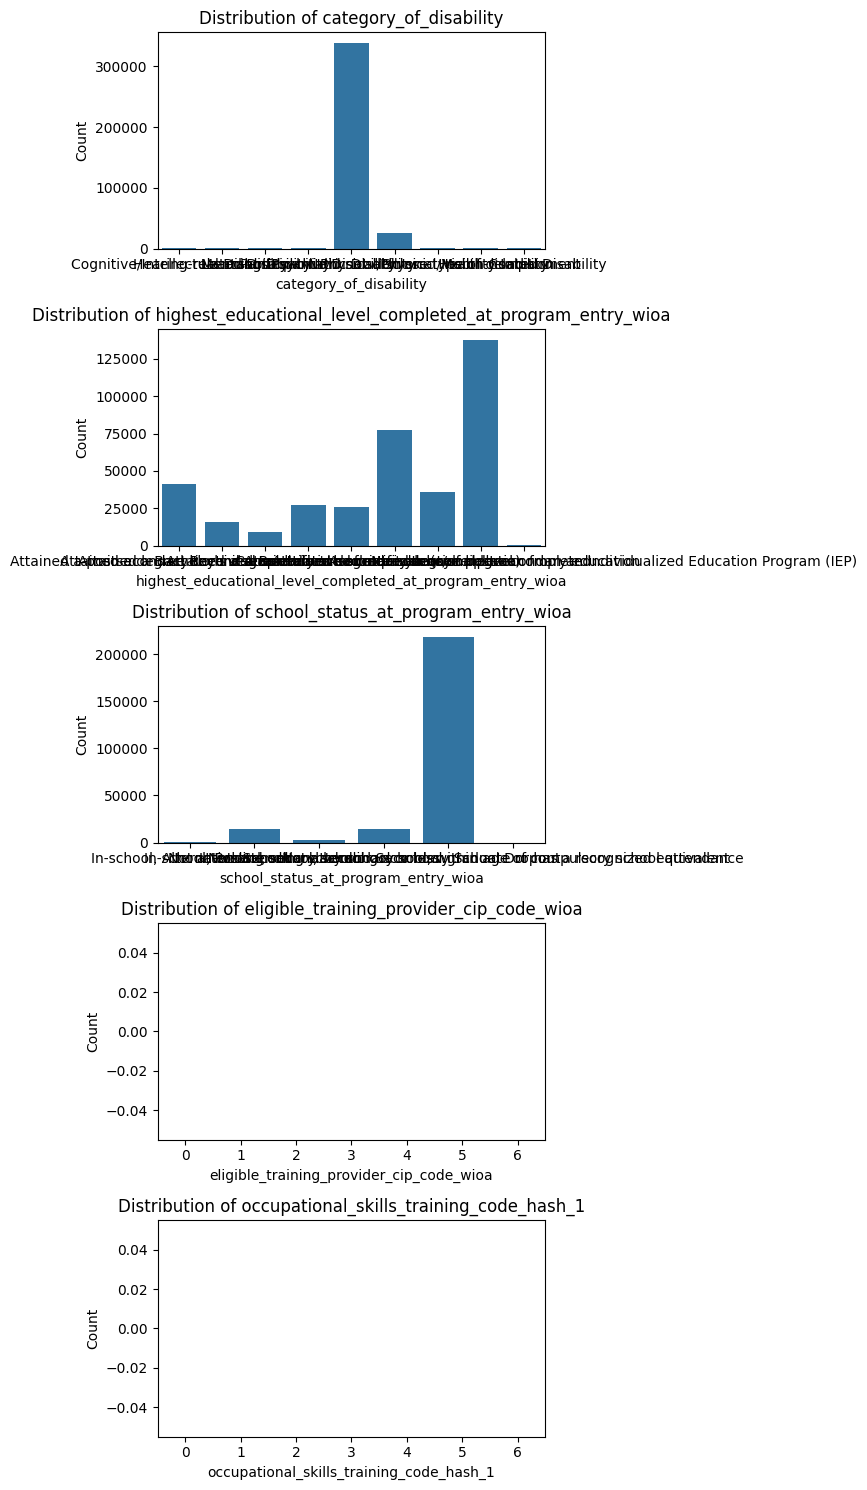

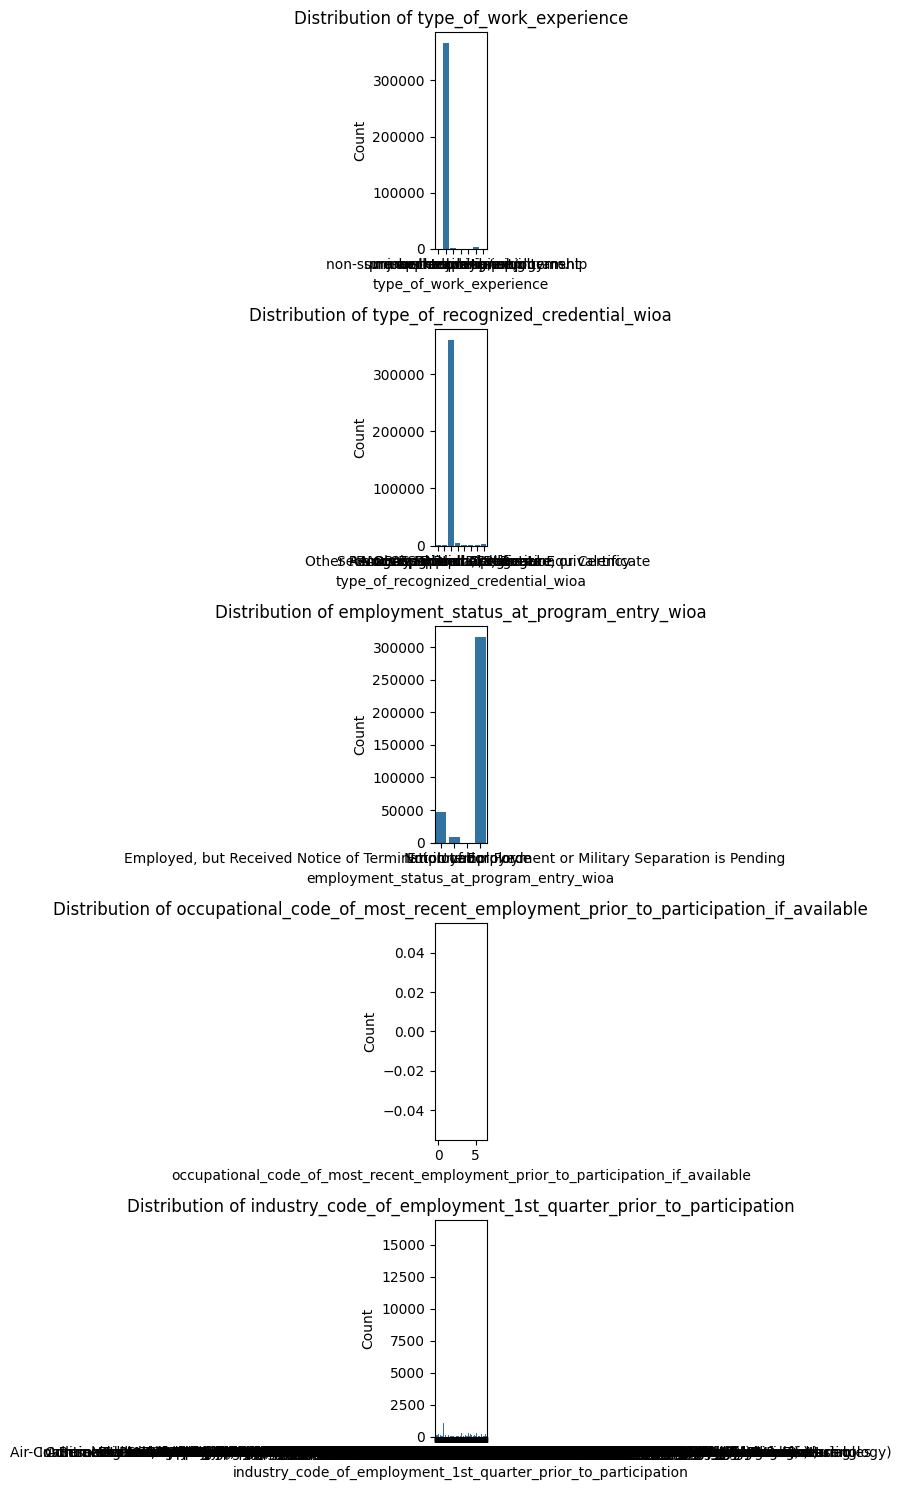

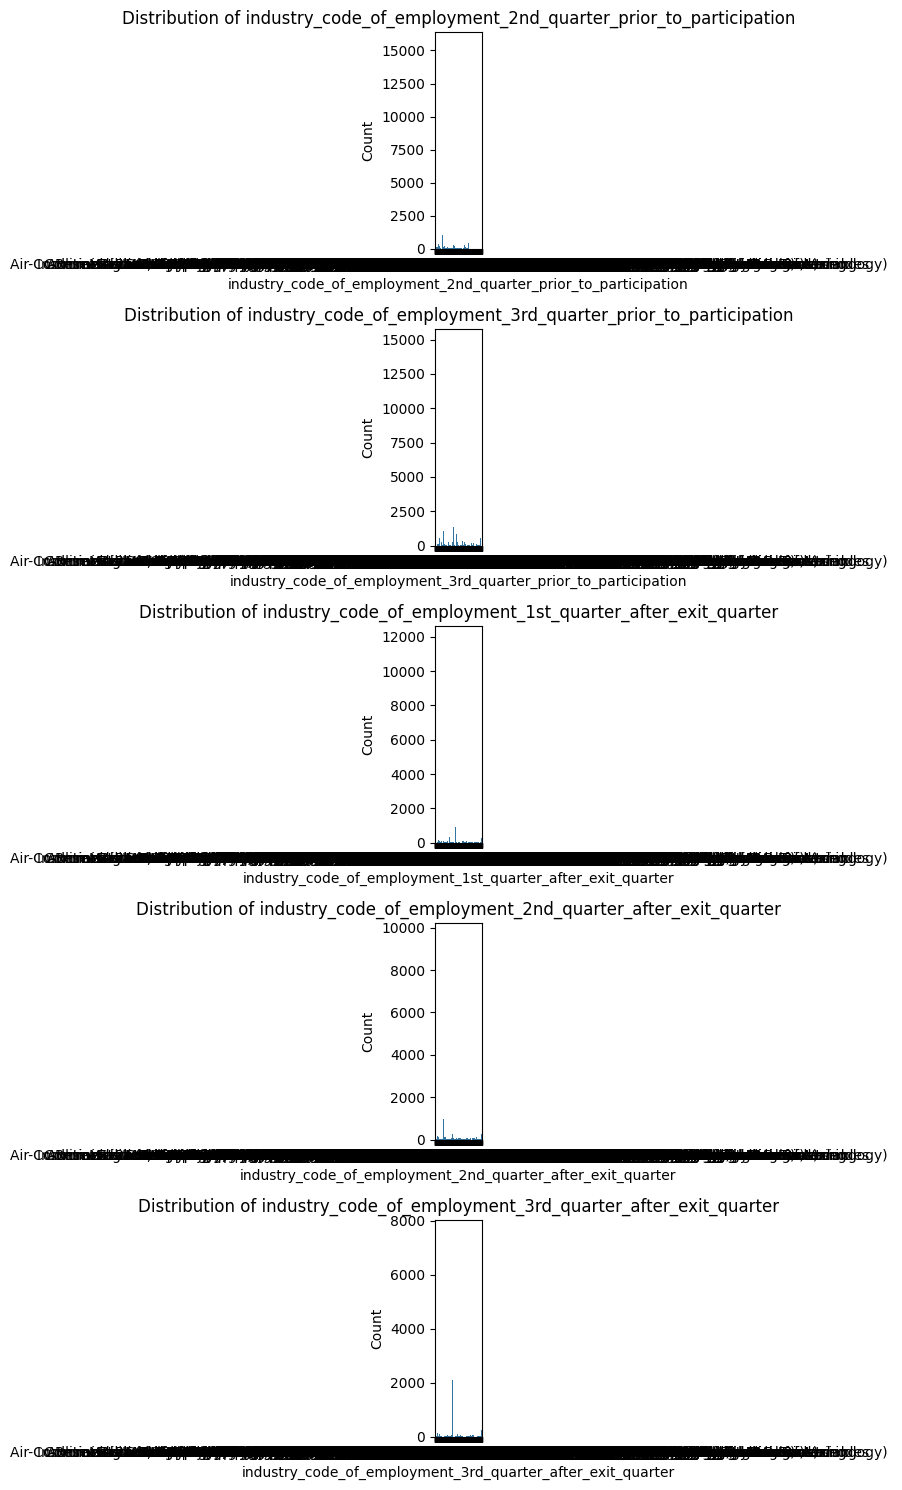

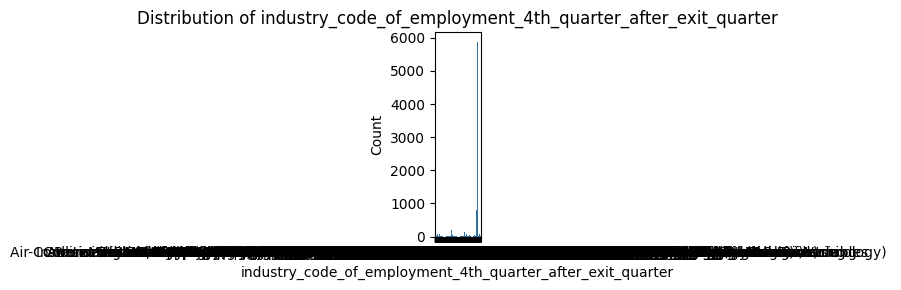

In [134]:
plot_categorical_features(data, cat_cols, batch_size=5)

In [135]:
plot_numerical_features(data, num_cols, batch_size=5)

In [43]:
display(data.isna().sum().reset_index().sort_values(ascending=False, by=0))

,index,0
132,date_attained_recognized_credential_hash_3_wioa,370909
92,received_pre_vocational_activities,370905
141,date_attained_graduate_post_graduate_degree_wioa,370897
130,date_attained_recognized_credential_hash_2_wioa,369868
133,date_of_most_recent_measurable_skill_gains_edu...,369833
160,wioa_youth_employment_rate_quarter_4,368948
158,wioa_youth_median_earnings_quarter_2,368846
136,date_of_most_recent_measurable_skill_gains_tra...,368653
135,date_of_most_recent_measurable_skill_gains_sec...,368237
37,date_of_actual_dislocation,368231


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

def plot_gender_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='sex_wioa', data=df, palette='pastel')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

def plot_age_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.histplot(df['age_at_participation'], bins=20, kde=True, color='skyblue')
    plt.title('Age Distribution of Participants')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

def plot_employment_status(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='employment_status_at_program_entry_wioa', data=df, palette='muted')
    plt.title('Employment Status at Program Entry')
    plt.xlabel('Employment Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


def plot_veteran_status(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='veteran_status', data=df, palette='Set2')
    plt.title('Veteran Status Breakdown')
    plt.xlabel('Veteran Status')
    plt.ylabel('Count')
    plt.show()

def plot_education_level(df):
    plt.figure(figsize=(8, 4))
    sns.countplot(y='highest_educational_level_completed_at_program_entry_wioa', data=df, palette='viridis')
    plt.title('Education Level at Program Entry')
    plt.xlabel('Count')
    plt.ylabel('Education Level')
    plt.show()

def plot_program_participation(df):
    plt.figure(figsize=(6, 4))
    sns.histplot(df['program_year_of_exit'], bins=10, kde=True, color='coral')
    plt.title('Program Participation Over Time')
    plt.xlabel('Program Year of Exit')
    plt.ylabel('Count')
    plt.show()

def plot_employment_rate(df):
    rate_columns = ['wioa_employment_rate_quarter_2', 'wioa_employment_rate_quarter_4']
    df_melted = df[rate_columns].melt(var_name='Quarter', value_name='Employment Rate')
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Quarter', y='Employment Rate', data=df_melted, palette='Blues')
    plt.title('Employment Rate After Program')
    plt.xlabel('Quarter')
    plt.ylabel('Employment Rate')
    plt.show()

def plot_exit_reasons(df):
    plt.figure(figsize=(8, 4))
    sns.countplot(y='other_reasons_for_exit_wioa', data=df, palette='coolwarm')
    plt.title('Reasons for Program Exit')
    plt.xlabel('Count')
    plt.ylabel('Exit Reason')
    plt.show()

def plot_assistance_impact(df):
    assistance_columns = ['supplemental_nutrition_assistance_program_snap', 'other_public_assistance_recipient']
    df_assist = df[assistance_columns].sum()
    
    plt.figure(figsize=(6, 4))
    df_assist.plot(kind='bar', color=['blue', 'orange'])
    plt.title('Impact of Public Assistance on Program Participation')
    plt.xlabel('Public Assistance Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_wioa', data=df, palette='pastel')


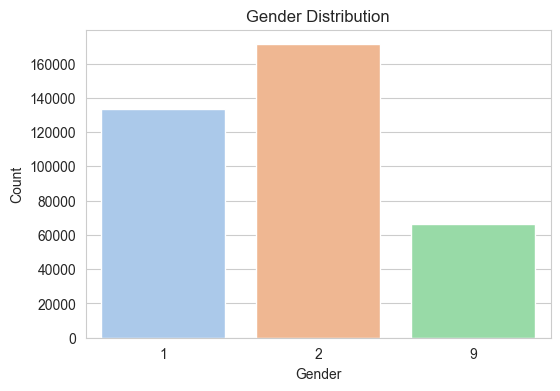

In [24]:
plot_gender_distribution(data)

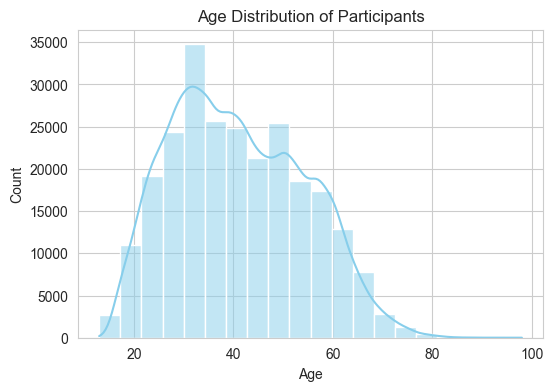

In [25]:
plot_age_distribution(data)

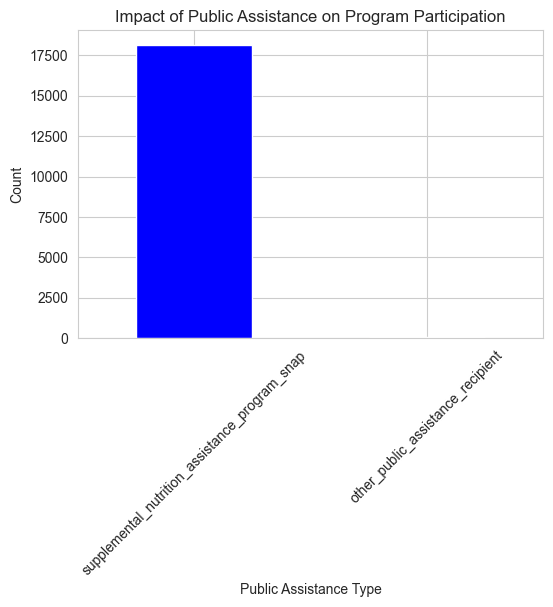

In [26]:
plot_assistance_impact(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='highest_educational_level_completed_at_program_entry_wioa', data=df, palette='viridis')


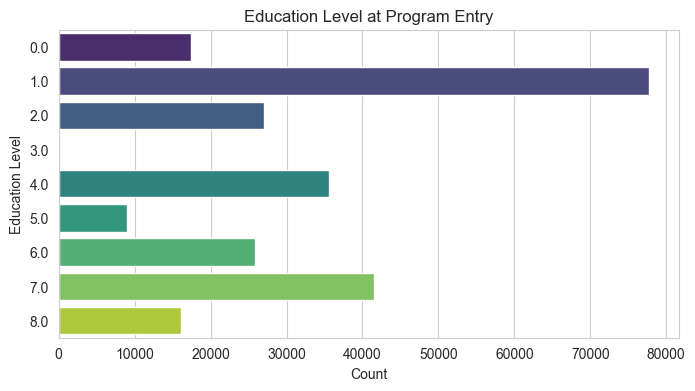

In [28]:
plot_education_level(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment_status_at_program_entry_wioa', data=df, palette='muted')


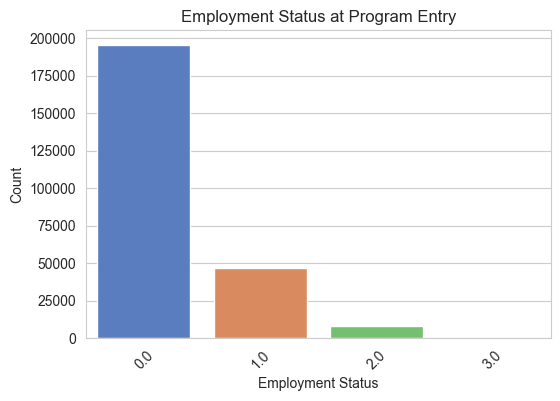

In [29]:
plot_employment_status(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quarter', y='Employment Rate', data=df_melted, palette='Blues')


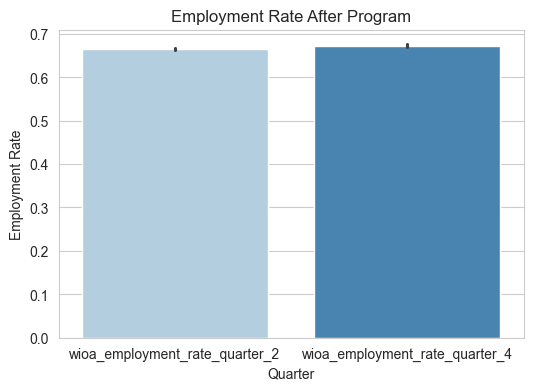

In [31]:
plot_employment_rate(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='other_reasons_for_exit_wioa', data=df, palette='coolwarm')


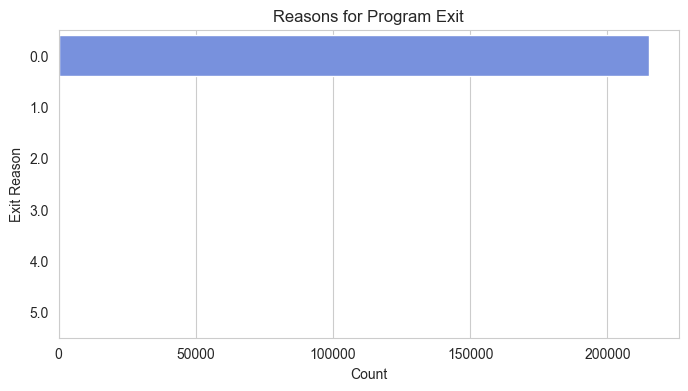

In [33]:
plot_exit_reasons(data)

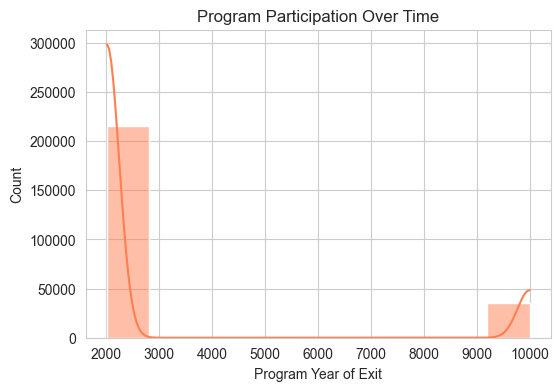

In [34]:
plot_program_participation(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='veteran_status', data=df, palette='Set2')


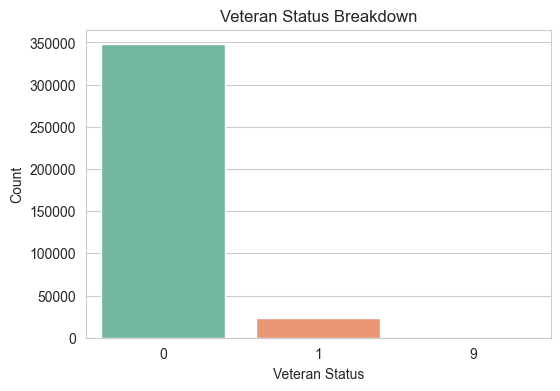

In [35]:
plot_veteran_status(data)